# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode():
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(
            '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
        )
    except:
        df = pd.read_csv('./data/fraud_detection_dataset.csv', nrows=10000, verbose=False)
    
    return df


In [2]:
df = ColabOuCode()

In [3]:
df.shape

(10000, 11)

In [4]:
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', 11)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)

## Tratamento

In [7]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for v in varMonet: df[v][df[v] > 0] = np.log(df[v][df[v] > 0])

df.head()



,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.194174,C1231006815,12.044353,11.984780,M1979787155,0.000000,0.0,0,0
1,1,PAYMENT,7.530630,C1666544295,9.964065,9.872240,M2044282225,0.000000,0.0,0,0
2,1,TRANSFER,5.198497,C1305486145,5.198497,0.000000,C553264065,0.000000,0.0,1,0
3,1,CASH_OUT,5.198497,C840083671,5.198497,0.000000,C38997010,9.960907,0.0,1,0
4,1,PAYMENT,9.364617,C2048537720,10.634749,10.305141,M1230701703,0.000000,0.0,0,0


In [8]:
df.describe(percentiles=(0.9,0.95,0.99))

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,4.178900,9.820534,8.496287,7.043499,5.607816,5.444933,0.006800,0.0
std,2.479821,2.037273,5.387092,6.170989,6.576639,6.600985,0.082185,0.0
min,1.000000,0.871293,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.000000,9.461779,9.970003,9.244736,0.000000,0.000000,0.000000,0.0
90%,7.000000,12.558320,15.169680,15.207445,14.728963,15.086454,0.000000,0.0
95%,7.000000,12.971847,15.671889,15.692040,15.702462,15.828902,0.000000,0.0
99%,7.000000,13.971437,16.058240,16.070774,16.485318,16.584693,0.000000,0.0
max,7.000000,16.118096,16.375093,16.381267,16.786751,16.768816,1.000000,0.0


Criando a nova feature.

Notei que tanto ```nameOrig ``` quanto ```nameDest``` possuem uma letra **C** ou **M** antes do número identificador. 

Aqui vou supor que M identifica uma loja (*market*) e C um cliente comum (*customer*).

In [9]:
df['prefixDest'] = None
df['prefixOrig'] = None

df['prefixDest'] = df['nameDest'].str[0]
df['prefixOrig'] = df['nameOrig'].str[0]


In [10]:
print(df['prefixDest'].unique())
print(df['prefixOrig'].unique())

['M' 'C']
['C']


In [11]:
# convertendo nameOrig e nameDest para int.
df['nameOrig'] = df['nameOrig'].str[1:]
df['nameDest'] = df['nameDest'].str[1:]

df[['nameOrig','nameDest']] = df[['nameOrig','nameDest']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  int64  
 4   oldbalanceOrig  10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  int64  
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
 11  prefixDest      10000 non-null  object 
 12  prefixOrig      10000 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 1015.8+ KB


## EAD

<AxesSubplot:>

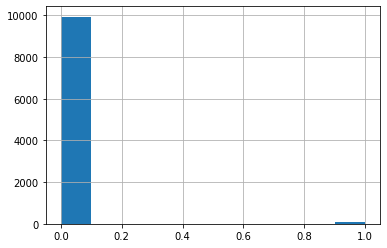

In [12]:
df['isFraud'].hist()

In [17]:
df.type.unique()[0]

'PAYMENT'

In [19]:
for t in df.type.unique():
    print(t)
    print(df['isFraud'][df['type'] == t].value_counts(normalize=True))

PAYMENT
0    1.0
Name: isFraud, dtype: float64
TRANSFER
0    0.964169
1    0.035831
Name: isFraud, dtype: float64
CASH_OUT
0    0.973505
1    0.026495
Name: isFraud, dtype: float64
DEBIT
0    1.0
Name: isFraud, dtype: float64
CASH_IN
0    1.0
Name: isFraud, dtype: float64


In [ ]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for v in varMonet:
    sns.displot(df[v], kde=True)
    plt.show()

In [ ]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df.corr()))
)

plt.show()

Praticamente todas as variaveis em ```nameOrig``` são únicas. 

Entretanto, ```nameDest``` repete bastante. Então vou utilizar essa coluna.

Acredito que se mantiver os balanços antigos e novos, vazarei informação de que a transação ocorreu de forma normal. 

Portanto utilizarei apenas ```oldbalanceOrig```, ```oldbalanceDest``` e ```amount```.

<center> <img src="https://media.giphy.com/media/d3mlE7uhX8KFgEmY/giphy.gif" width=500>


In [ ]:

colsSelect = [
    'step',
    'type_CASH_IN',
    'type_CASH_OUT',
    'type_DEBIT',
    'type_PAYMENT',
    'type_TRANSFER',
    'amount',
    'prefixorig',
#    'nameOrig',
    'oldbalanceOrig',
#    'newbalanceOrig',
    'prefixorig',
    'nameDest',
    'oldbalanceDest',
#    'newbalanceDest',
    'isFraud',
#    'isFlaggedFraud'
]

df = df[colsSelect]
df

In [ ]:
df[df['type_PAYMENT'] == 1].describe()